In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (10, 6)

file_path = '/content/default of credit card clients.xls - Data.csv'
df = pd.read_csv(file_path, header=1)


In [ ]:
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

df.columns = [
    'Credit_Amount', 'Gender', 'Education', 'Marital_Status', 'Age',
    'Pay_Sep', 'Pay_Aug', 'Pay_Jul', 'Pay_Jun', 'Pay_May', 'Pay_Apr',
    'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
    'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
    'Default_Payment'
]


In [ ]:
df.isnull().sum()


,0
Credit_Amount,0
Gender,0
Education,0
Marital_Status,0
Age,0
Pay_Sep,0
Pay_Aug,0
Pay_Jul,0
Pay_Jun,0
Pay_May,0


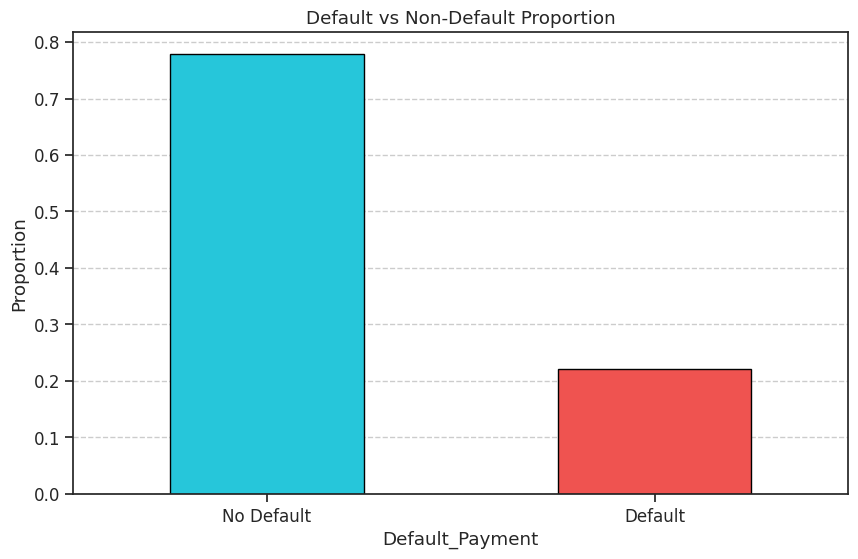

In [ ]:
default_counts = df['Default_Payment'].value_counts(normalize=True)
default_counts.plot(kind='bar', color=['#26c6da', '#ef5350'], edgecolor='black')
plt.title("Default vs Non-Default Proportion")
plt.xticks(ticks=[0, 1], labels=["No Default", "Default"], rotation=0)
plt.ylabel("Proportion")
plt.grid(axis='y', linestyle='--')
plt.show()


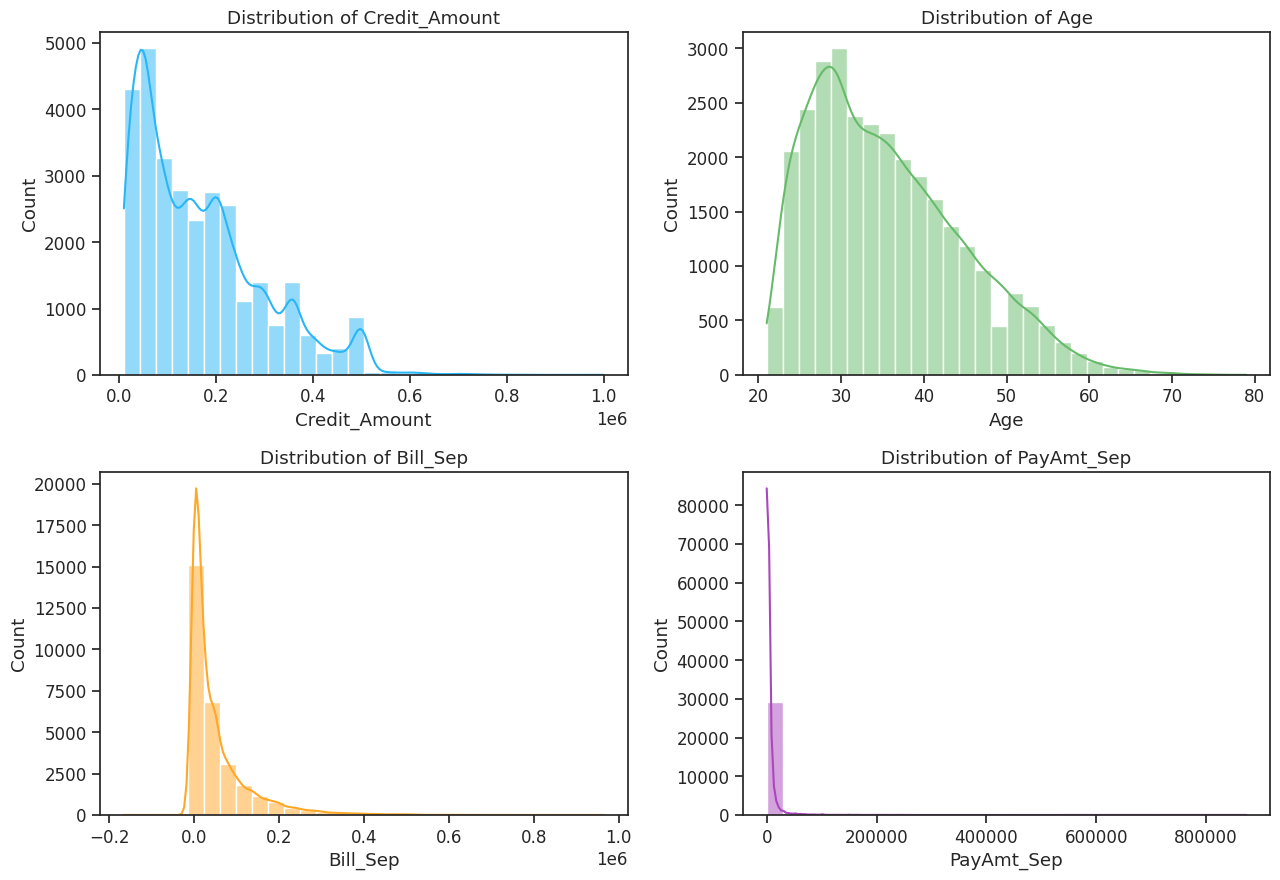

In [ ]:
numeric = ['Credit_Amount', 'Age', 'Bill_Sep', 'PayAmt_Sep']
color_set = ['#29b6f6', '#66bb6a', '#ffa726', '#ab47bc']

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
for i, col in enumerate(numeric):
    sns.histplot(df[col], bins=30, ax=axes[i//2, i%2], color=color_set[i], kde=True)
    axes[i//2, i%2].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


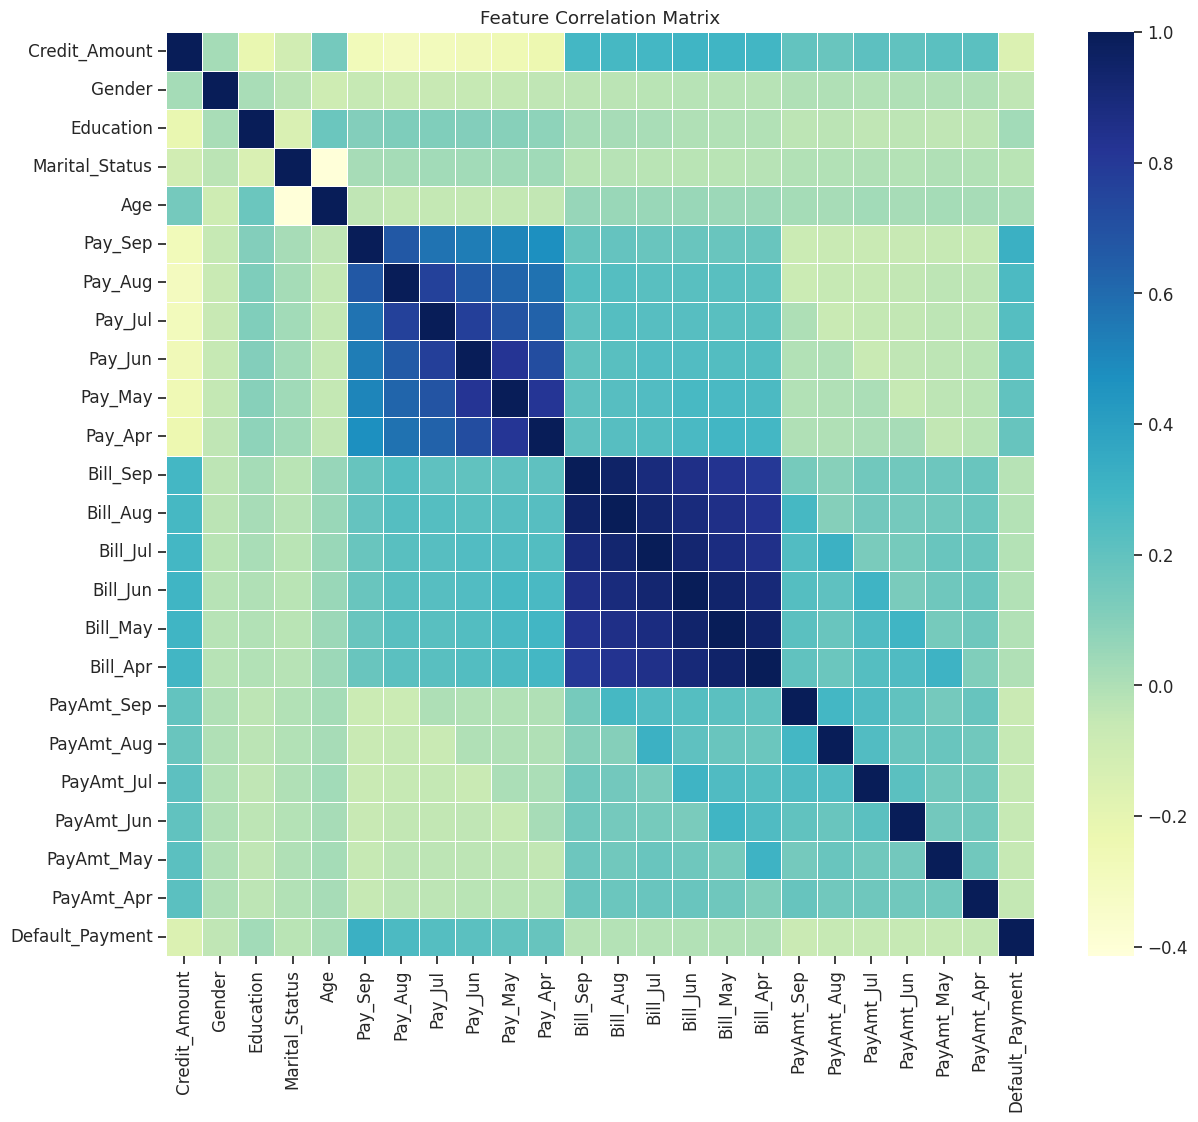

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('Default_Payment', axis=1))
scaled_df = pd.DataFrame(scaled, columns=df.columns[:-1])
scaled_df['Default_Payment'] = df['Default_Payment']

X = scaled_df.drop('Default_Payment', axis=1)
y = scaled_df['Default_Payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Preprocessing Done")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


✅ Preprocessing Done
Train Shape: (24000, 23)
Test Shape: (6000, 23)


<ipython-input-15-e0c68670a6d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Default_Payment', y='Credit_Amount', palette='pastel')


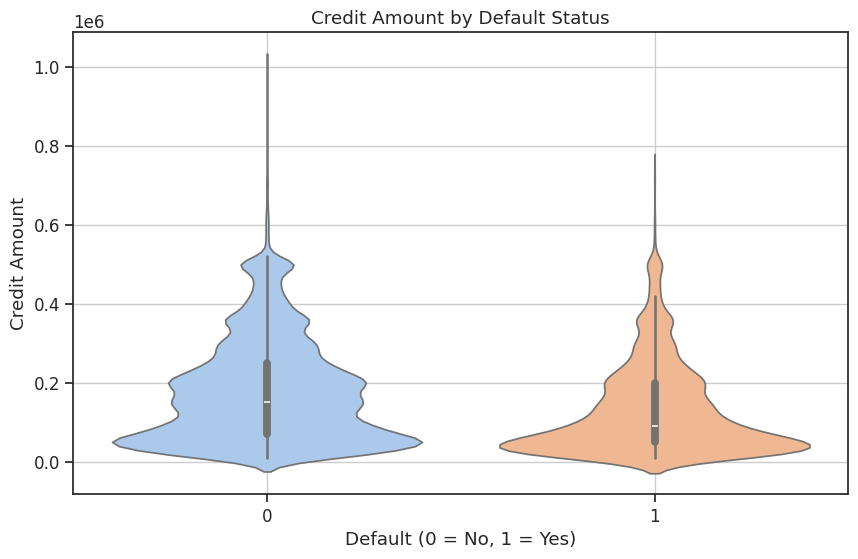

In [ ]:
sns.violinplot(data=df, x='Default_Payment', y='Credit_Amount', palette='pastel')
plt.title("Credit Amount by Default Status")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Amount")
plt.grid(True)
plt.show()


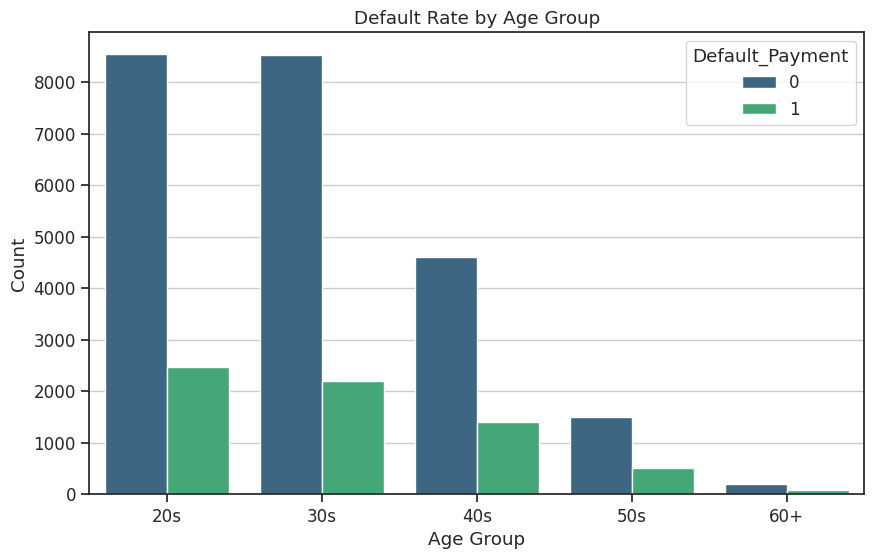

In [ ]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20s', '30s', '40s', '50s', '60+'])
sns.countplot(data=df, x='Age_Group', hue='Default_Payment', palette='viridis')
plt.title("Default Rate by Age Group")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.grid(axis='y')
plt.show()
